In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 63 bytes


In [ ]:
!kaggle datasets download -d mcdonalds/nutrition-facts

  0% 0.00/7.37k [00:00<?, ?B/s]
100% 7.37k/7.37k [00:00<00:00, 14.1MB/s]


In [ ]:
!unzip nutrition-facts.zip

Archive:  nutrition-facts.zip
  inflating: menu.csv                


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('menu.csv')
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


In [ ]:
# check null
df.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In [ ]:
# top 10 beverage based on largest calories
df_beverage = df.loc[df['Category'].isin(['Beverages'])]
df_beverage = df_beverage.nlargest(10,'Calories')

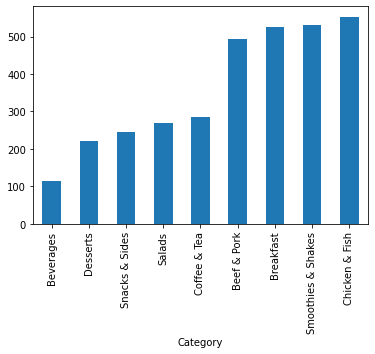

In [ ]:
df.groupby('Category')['Calories'].mean().sort_values(ascending=True).plot(kind='bar')

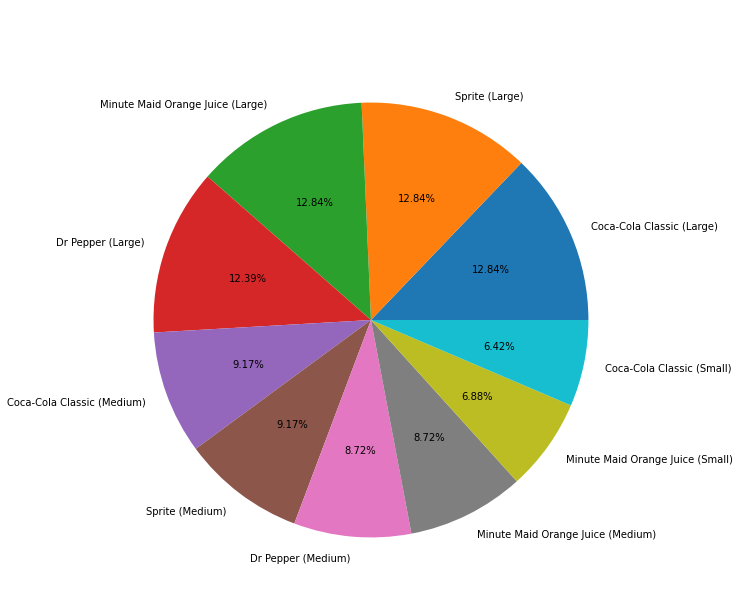

In [ ]:
# plt.pie(data, labels = cars) 
# membuat pie chart
plt.figure(figsize=(10,10))
plt.pie(df_beverage['Calories'],labels = df_beverage['Item'], autopct='%1.2f%%')
plt.title('Top 10 Beverage with Highiest Calories',loc='center',pad=30,fontsize=15,color='White')
plt.show()

In [ ]:
df_c = df[df['Item'].str.contains("Classic Sandwich")]

In [ ]:
df_c['nutri_value']= (df_c['Total Fat (% Daily Value)'] + df_c['Calcium (% Daily Value)']+ df_c['Carbohydrates (% Daily Value)']+df_c['Saturated Fat (% Daily Value)']+df_c['Cholesterol (% Daily Value)']+df_c['Sodium (% Daily Value)']+df_c['Dietary Fiber (% Daily Value)']+df_c['Vitamin A (% Daily Value)']+df_c['Vitamin C (% Daily Value)']+df_c['Iron (% Daily Value)'])/10

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

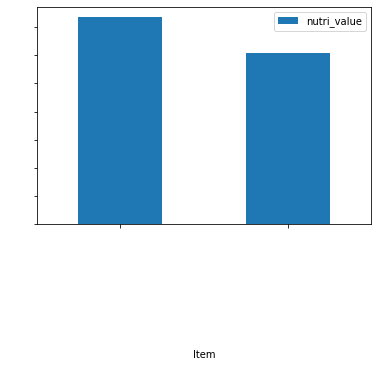

In [ ]:
df_c.plot(x="Item",y='nutri_value',kind='bar')
plt.yticks(color='white')
plt.xticks(rotation = 30,color='white')

In [ ]:
df_e = df[df['Item'].str.contains("Sausage McMuffin")]
df_e['nutri_value']= df_e['Total Fat (% Daily Value)'] + df_e['Calcium (% Daily Value)']+ df_e['Carbohydrates (% Daily Value)']+df_e['Saturated Fat (% Daily Value)']+df_e['Cholesterol (% Daily Value)']+df_e['Sodium (% Daily Value)']+df_e['Dietary Fiber (% Daily Value)']+df_e['Vitamin A (% Daily Value)']+df_e['Vitamin C (% Daily Value)']+df_e['Iron (% Daily Value)']/10

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

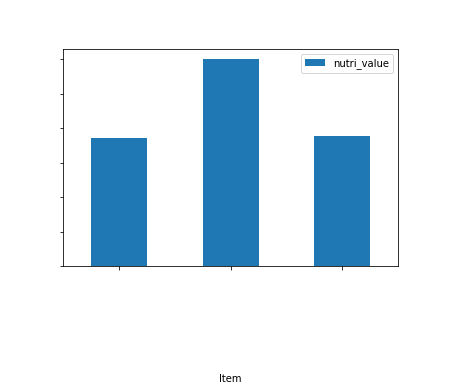

In [ ]:
df_e.plot(x="Item",y='nutri_value',kind='bar')
plt.title('Nutritional Value of Sausage McMuffin with or without Eggs',pad=30,fontsize=15,color='white')
plt.yticks(color='white')
plt.xticks(rotation=30,color='white')

In [ ]:
df_daily = df[(df['Vitamin A (% Daily Value)'] < ) & (df['Carbohydrates (% Daily Value)'] >= 260) & (df['Protein'] >= 50)]
df_daily.shape

(252, 24)

Data Exploratory

In [ ]:
df_category = df.groupby('Category')['Vitamin A (% Daily Value)','Vitamin C (% Daily Value)','Protein'].sum().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Category,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Protein
0,Beef & Pork,104,110,410
1,Beverages,20,634,36
2,Breakfast,291,374,834
3,Chicken & Fish,552,341,786
4,Coffee & Tea,1020,0,842
5,Desserts,36,29,28
6,Salads,880,170,119
7,Smoothies & Shakes,525,195,304
8,Snacks & Sides,63,366,109


<Figure size 1800x360 with 0 Axes>

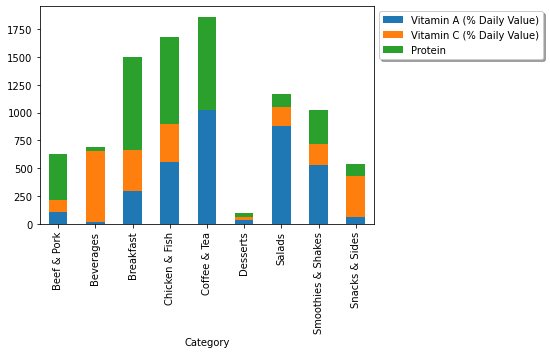

In [ ]:
plt.figure(figsize=(25,5))
df_category.reset_index().plot(
    x="Category", y=['Vitamin A (% Daily Value)','Vitamin C (% Daily Value)','Protein'], kind="bar", stacked=True
)
plt.legend(bbox_to_anchor=(1,1),shadow=True,ncol=True)


In [219]:
import altair as alt
# Proteins, Dietary Fibre,Carbs and Total Fat (Size represents Total Fat)
alt.Chart(df).mark_point().encode(
    x='Calories from Fat',
    y='Cholesterol',
    color='Item',
    size = 'Sodium',
).interactive()

alt.Chart(...)

In [220]:

# Proteins, Dietary Fibre,Carbs and Total Fat (Size represents Total Fat)
alt.Chart(df).mark_point().encode(
    x='Protein',
    y='Carbohydrates',
    color='Dietary Fiber (% Daily Value)',
    size = 'Total Fat',
).interactive()

alt.Chart(...)